In [46]:
from google.colab import files
uploaded = files.upload()


Saving sentiment-analysis-1.csv to sentiment-analysis-1 (1).csv


In [18]:
import pandas as pd

# Replace with the actual filename from extracted folder
df = pd.read_csv("sentiment-analysis-1.csv")
df.head()


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""I love this product!""",Positive,Twitter,6/15/2023 9:23:14 AM,@user123,New York,0.85
1,"""The service was terrible.""",Negative,Yelp Reviews,6/15/2023 11:45:32 AM,user456,Los Angeles,0.65
2,"""This movie is amazing!""",Positive,IMDb,6/15/2023 2:10:22 PM,moviefan789,London,0.92
3,"""I'm so disappointed with their customer suppo...",Negative,Online Forum,6/15/2023 5:35:11 PM,forumuser1,Toronto,0.78
4,"""Just had the best meal of my life!""",Positive,TripAdvisor,6/16/2023 8:50:59 AM,foodie22,Paris,0.88


In [19]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [20]:
df.columns

Index(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location',
       'Confidence Score'],
      dtype='object')

In [42]:
df = pd.read_csv("sentiment-analysis-1.csv")  # replace with actual path if needed
df = df[['Text', 'Sentiment']]
df.dropna(inplace=True)
df.head()


,Text,Sentiment
0,"""I love this product!""",Positive
1,"""The service was terrible.""",Negative
2,"""This movie is amazing!""",Positive
3,"""I'm so disappointed with their customer suppo...",Negative
4,"""Just had the best meal of my life!""",Positive


In [23]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df['cleaned_text'] = df['Text'].apply(clean_text)


/tmp/ipython-input-24-80419752.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='viridis')


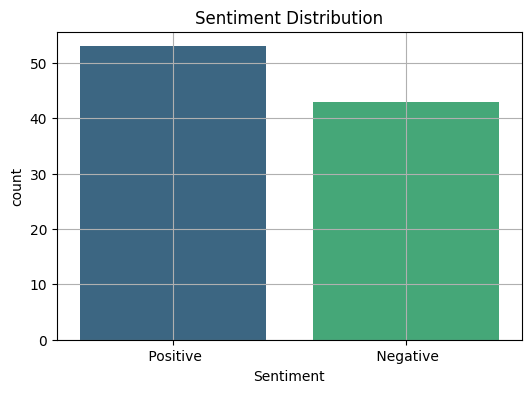

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', palette='viridis')
plt.title("Sentiment Distribution")
plt.grid()
plt.show()


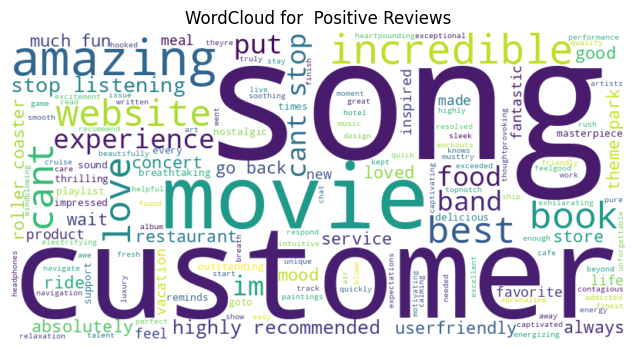

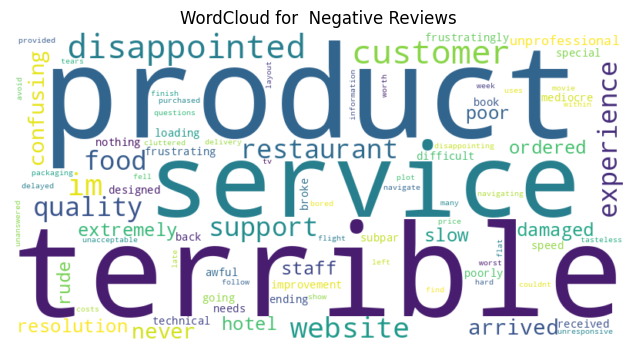

In [25]:
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['cleaned_text'])
    plt.figure(figsize=(8,4))
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {sentiment} Reviews")
    plt.show()


In [26]:
X = df['cleaned_text']
y = df['Sentiment']

vectorizer = TfidfVectorizer(max_features=3000)
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [29]:
y_pred = model.predict(X_test)

print("Accuracy Score:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 100.0 %

Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         5
    Positive       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



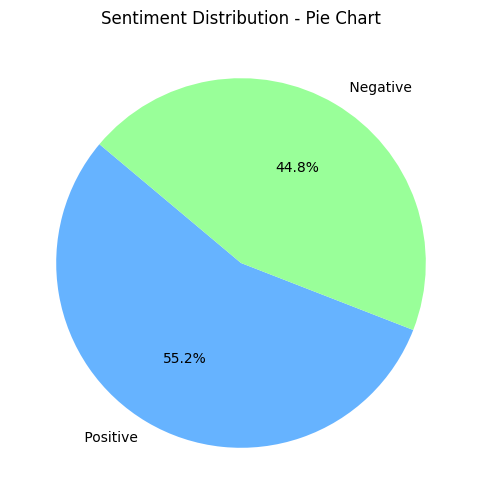

In [30]:
plt.figure(figsize=(6,6))
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Sentiment Distribution - Pie Chart')
plt.ylabel("")
plt.show()


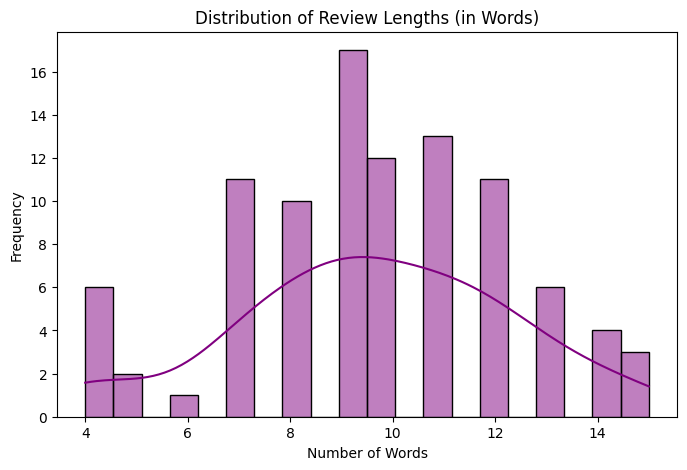

In [33]:
df['review_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=20, kde=True, color='purple')
plt.title("Distribution of Review Lengths (in Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


/tmp/ipython-input-34-462438687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='review_length', data=df, palette='Pastel1')


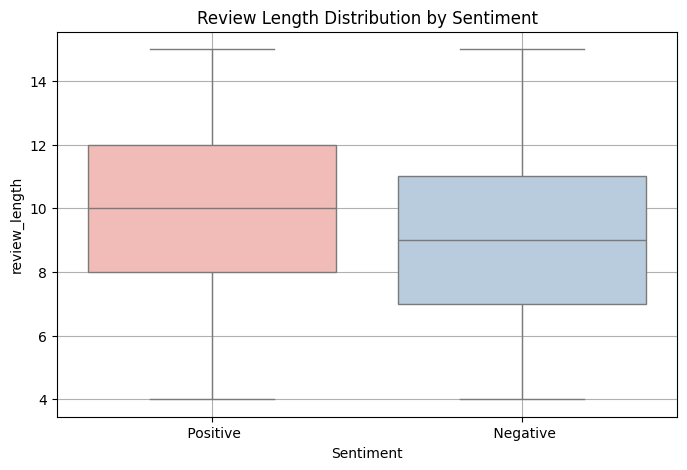

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Sentiment', y='review_length', data=df, palette='Pastel1')
plt.title("Review Length Distribution by Sentiment")
plt.grid(True)
plt.show()


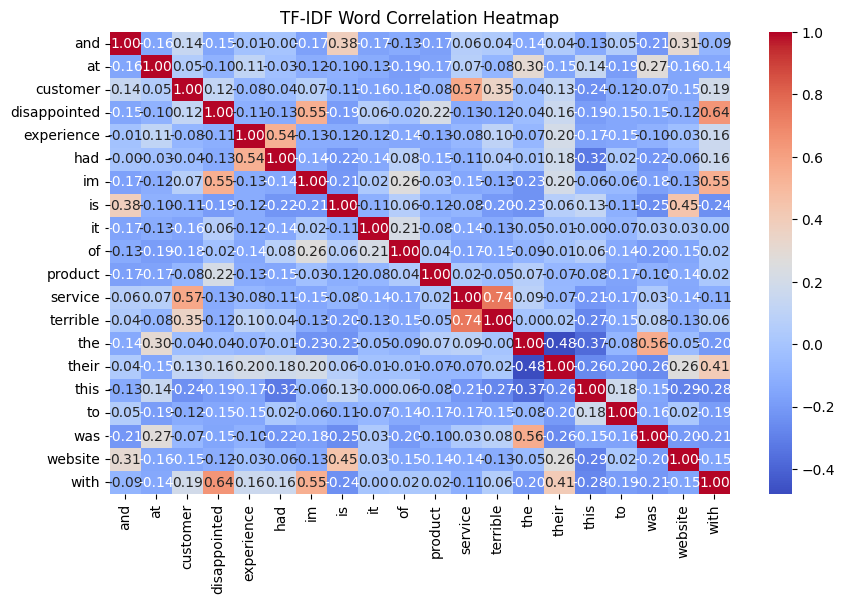

In [35]:
import numpy as np

sampled_df = df.sample(n=min(100, len(df)), random_state=42)  # use sample to avoid too many words
tfidf_sample = TfidfVectorizer(max_features=20)
X_small = tfidf_sample.fit_transform(sampled_df['cleaned_text'])

tfidf_df = pd.DataFrame(X_small.toarray(), columns=tfidf_sample.get_feature_names_out())

plt.figure(figsize=(10,6))
sns.heatmap(tfidf_df.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("TF-IDF Word Correlation Heatmap")
plt.show()


In [47]:
if 'Date/Time' in df.columns:
    df['Date'] = pd.to_datetime(df['Date/Time'], errors='coerce')
    df['Date'] = df['Date'].dt.date
    trend = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

    trend.plot(figsize=(12,6), marker='o')
    plt.title("Sentiment Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")
    plt.grid(True)
    plt.show()


In [48]:
if 'Date/Time' in df.columns:
    df['Date'] = pd.to_datetime(df['Date/Time'], errors='coerce').dt.date
    trend = df.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)

    if trend.shape[0] > 0:
        trend.plot(figsize=(12,6), marker='o')
        plt.title("Sentiment Trend Over Time")
        plt.xlabel("Date")
        plt.ylabel("Number of Reviews")
        plt.grid(True)
        plt.show()
    else:
        print("No valid trend data to plot 💔")
else:
    print("'Date/Time' column not found in DataFrame. Cannot plot sentiment trend.")

'Date/Time' column not found in DataFrame. Cannot plot sentiment trend.
